# IntelliRefinder
#### Using machine learning to identify the mortgage refinance opportunity for mortgage lenders

Meng Chen, PhD                                                                                         
Data Science Fellow at Insight Data Science                                              
[LinkedIn](https://www.linkedin.com/in/mlchen/); [GitHub](https://github.com/biomchen)

#### This notebook is for preprocessing the mortgagte data through Home Mortgage Disclosure Act

In [13]:
from refinder import *
import modin.pandas as mpd
from pathlib import Path
import matplotlib.pyplot as plt

#### US Home Mortgage data from 2007-2017

In [2]:
db = '../data/hmda/hmda.sqlite'
conn = connect_sql(db)

#### Inspecting the data structure

In [3]:
hmda_2017_wa = pd.read_sql_query('SELECT * from hmda_2017 WHERE(state_name = "Washington")', conn)
print('Mortgage data has {} features'.format(hmda_2017_wa.shape[1]))

Mortgage data has 79 features


In [4]:
print(hmda_2017_wa.columns)

Index(['index', 'as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_race_name_2',
       'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_applicant_r

#### Attain the code books of paired features

In [5]:
pairs = [['agency_name','agency_code'], ['loan_type_name', 'loan_type'],
         ['property_type_name', 'property_type'], ['loan_purpose_name', 'loan_purpose'],
         ['owner_occupancy_name', 'owner_occupancy'], ['preapproval_name', 'preapproval'],
         ['action_taken_name', 'action_taken'], ['msamd_name', 'msamd'],
         ['state_name', 'state_code'], ['county_name', 'county_code'],
         ['applicant_ethnicity_name', 'applicant_ethnicity'], ['co_applicant_ethnicity_name', 'co_applicant_ethnicity'],
         ['applicant_race_name_1', 'applicant_race_1'], ['applicant_race_name_2','applicant_race_2'],
         ['applicant_race_name_3', 'applicant_race_3'], ['applicant_race_name_4','applicant_race_4'], 
         ['applicant_race_name_5', 'applicant_race_5'], ['co_applicant_race_name_1','co_applicant_race_1'],
         ['co_applicant_race_name_2','co_applicant_race_2'], ['co_applicant_race_name_3', 'co_applicant_race_3'], 
         ['co_applicant_race_name_4','co_applicant_race_4'], ['co_applicant_race_name_5', 'co_applicant_race_5'],
         ['applicant_sex_name', 'applicant_sex'], ['co_applicant_sex_name', 'co_applicant_sex'],
         ['purchaser_type_name', 'purchaser_type'],['denial_reason_name_1', 'denial_reason_1'],
         ['denial_reason_name_2','denial_reason_2'], ['denial_reason_name_3','denial_reason_3'],
         ['hoepa_status_name', 'hoepa_status'], ['lien_status_name','lien_status'], 
         ['edit_status_name', 'edit_status']]

In [6]:
hmda_code_book = get_feature_codes(hmda_2017_wa, pairs)
print(hmda_code_book)

{'agency_name': {'Consumer Financial Protection Bureau': '9', 'National Credit Union Administration': '5', 'Department of Housing and Urban Development': '7', 'Federal Deposit Insurance Corporation': '3', 'Federal Reserve System': '2', 'Office of the Comptroller of the Currency': '1'}, 'loan_type_name': {'Conventional': '1', 'FHA-insured': '2', 'VA-guaranteed': '3', 'FSA/RHS-guaranteed': '4'}, 'property_type_name': {'One-to-four family dwelling (other than manufactured housing)': '1'}, 'loan_purpose_name': {'Home purchase': '1', 'Home improvement': '2', 'Refinancing': '3'}, 'owner_occupancy_name': {'Owner-occupied as a principal dwelling': '1'}, 'preapproval_name': {'Not applicable': '3', 'Preapproval was not requested': '2', 'Preapproval was requested': '1'}, 'action_taken_name': {'Loan originated': '1'}, 'msamd_name': {'Bellingham - WA': '13380', 'Seattle, Bellevue, Everett - WA': '42644', None: None, 'Olympia, Tumwater - WA': '36500', 'Portland, Vancouver, Hillsboro - OR, WA': '3890

#### Get the 2008-2017 mortgage informaiton of the Washington State

In [7]:
years = ['2008', '2009', '2010', '2011', '2012', 
         '2013', '2014', '2015', '2016', '2017']
features = """
            as_of_year, agency_code, loan_type, 
            property_type, loan_purpose, owner_occupancy,
            loan_amount_000s, preapproval, action_taken, 
            msamd, census_tract_number, applicant_ethnicity, 
            co_applicant_ethnicity, applicant_race_1, co_applicant_race_1, 
            applicant_sex, co_applicant_sex, applicant_income_000s, 
            purchaser_type, rate_spread, hoepa_status, lien_status, 
            edit_status, population, minority_population, 
            hud_median_family_income, tract_to_msamd_income, 
            number_of_owner_occupied_units, number_of_1_to_4_family_units, 
            application_date_indicator
           """

In [8]:
hmda_wa = get_all_transcations(db, features, years, "Washington")
print('Mortgage data of Washington State has {0} records with {1} features.'.
      format(hmda_wa.shape[0], hmda_wa.shape[1]))

Mortgage data of Washington State has 1986416 records with 30 features.


#### Save the file

In [21]:
hmda_wa.to_csv('../data/hmda/hmda_wa.csv')

#### Remove null from the data with threshold 30% for missing data in one feature

In [9]:
hmda_wa = pd.read_csv('../data/hmda/hmda_wa.csv')
hmda_wa = remove_nulls(hmda_wa, 0.25)
print('After remove the columns with 25% nulls, the mortgage data has {} features'.
    format(hmda_wa.shape[1]))

After remove the columns with 25% nulls, the mortgage data has 29 features


#### Remove the rows that has missing data

In [10]:
hmda_wa.dropna(inplace=True, axis=0)
print('After remove the rows that have nulls, the mortgage data has {} records'.
     format(hmda_wa.shape[0]))

After remove the rows that have nulls, the mortgage data has 1532364 records


In [11]:
print(hmda_wa.columns)
print(len(hmda_wa.columns))

Index(['Unnamed: 0', 'as_of_year', 'agency_code', 'loan_type', 'property_type',
       'loan_purpose', 'owner_occupancy', 'loan_amount_000s', 'preapproval',
       'action_taken', 'msamd', 'census_tract_number', 'applicant_ethnicity',
       'co_applicant_ethnicity', 'applicant_race_1', 'co_applicant_race_1',
       'applicant_sex', 'co_applicant_sex', 'applicant_income_000s',
       'purchaser_type', 'hoepa_status', 'lien_status', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'application_date_indicator'],
      dtype='object')
29


#### Visual inspect the distribution of the features

In [14]:
def hist_plots(df, i, j):
    column_list = [df.columns[x:x+j] for x in range(0, len(df.columns), j)]
    fig, axes = plt.subplots(i, j, figsize=(16, 21), 
                             sharey=True, 
                             tight_layout=True)
    for n in range(i):
        for m in range(j):
            column = column_list[n][m]
            df1 = df[column].dropna()
            bins = len(df1.unique())
            axes[n, m].hist(df1, bins=20, color='orange')
            axes[n, m].set_title(column)
            axes[n, m].set_xlabel('')
            axes[n, m].set_ylabel('')

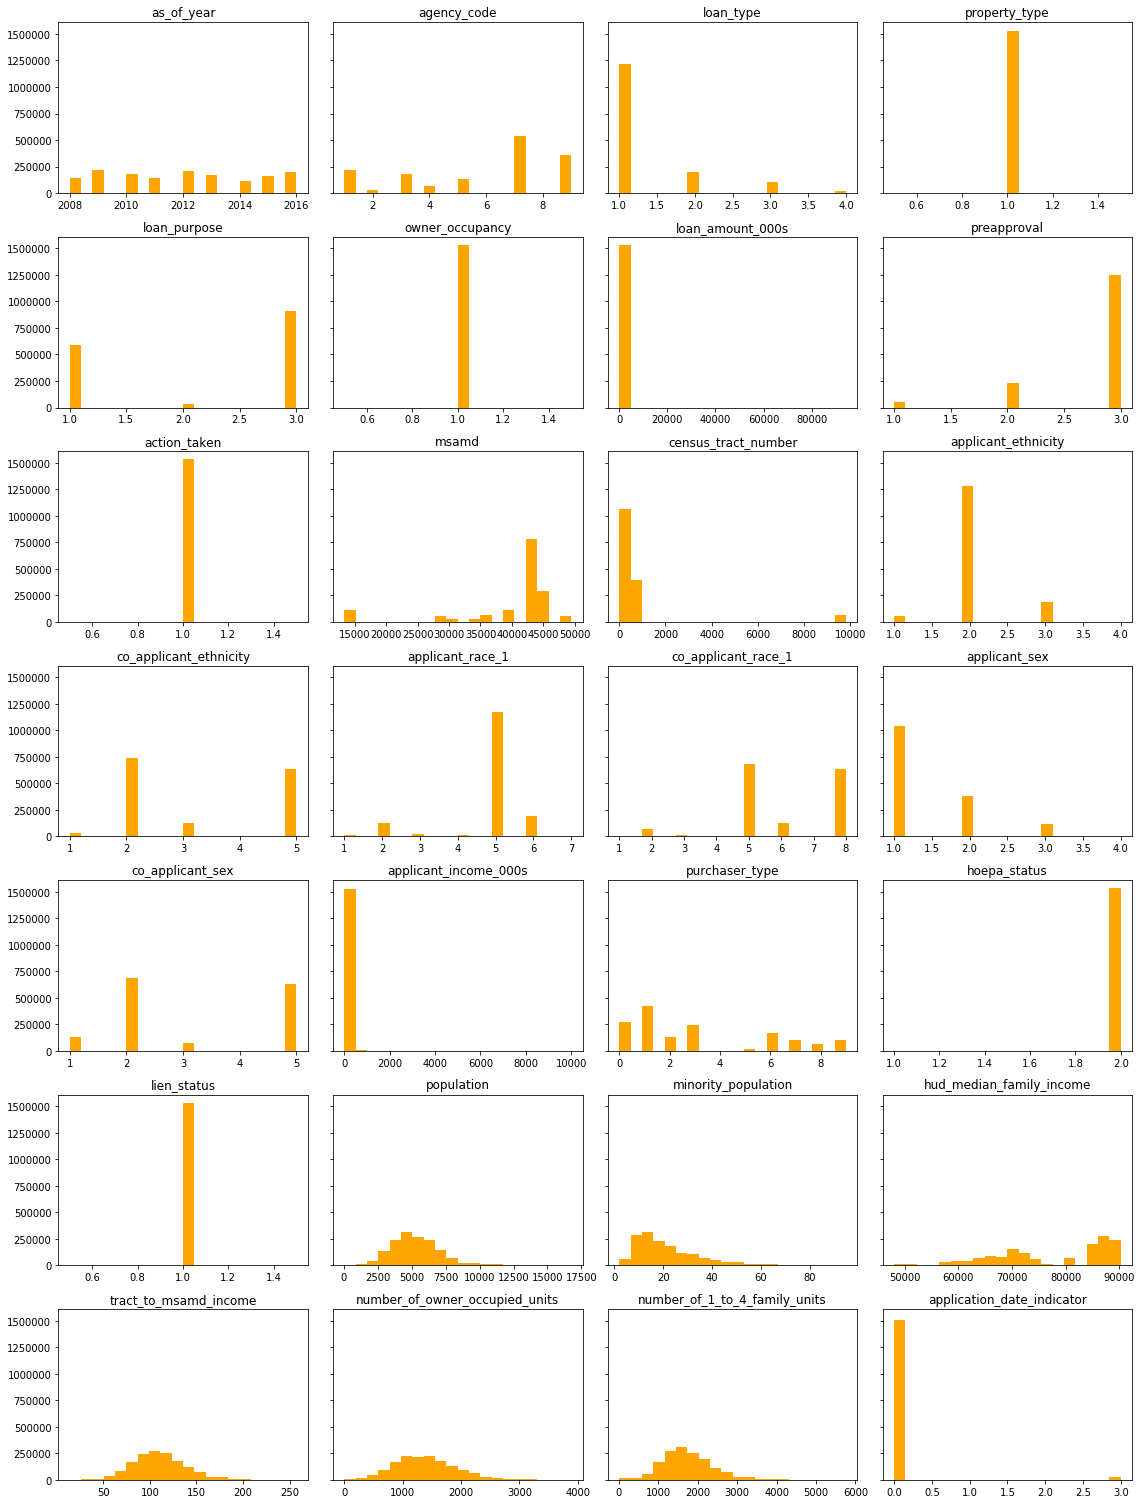

In [15]:
hist_plots(hmda_wa.iloc[:,1:], 7, 4)

### Seven features are removed from the hmda dataset

In [16]:
hmda_wa_clean = hmda_wa.drop(columns =['Unnamed: 0', 'property_type', 'owner_occupancy','action_taken', 
                                       'msamd', 'hoepa_status','lien_status', 'application_date_indicator'])
hmda_wa_clean.head()

,as_of_year,agency_code,loan_type,loan_purpose,loan_amount_000s,preapproval,census_tract_number,applicant_ethnicity,co_applicant_ethnicity,applicant_race_1,...,applicant_sex,co_applicant_sex,applicant_income_000s,purchaser_type,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
0,2008,7,1,3,260,3,609.03,2,2,5,...,1,2,74.0,9,3083.0,21.379999,66200.0,113.639999,1013.0,1089.0
1,2008,4,1,3,124,3,17.00,2,2,2,...,1,2,91.0,9,4317.0,12.580000,56700.0,86.230003,1180.0,1525.0
2,2008,4,1,3,144,3,19.00,1,3,6,...,1,3,50.0,9,3740.0,13.070000,56700.0,70.040001,945.0,1648.0
3,2008,4,1,1,100,3,26.00,2,2,5,...,2,1,32.0,9,4754.0,18.830000,56700.0,62.509998,897.0,1721.0
4,2008,4,1,3,73,3,23.00,3,3,6,...,1,2,57.0,9,5197.0,16.410000,56700.0,60.419998,1094.0,2132.0


#### Converted the loan and income to correct format

In [17]:
hmda_wa_clean['loan_amount'] = hmda_wa_clean['loan_amount_000s']*100
hmda_wa_clean.drop(columns=['loan_amount_000s'], inplace=True)
hmda_wa_clean['applicant_income'] = hmda_wa_clean['applicant_income_000s']*100
hmda_wa_clean.drop(columns=['applicant_income_000s'], inplace=True)
hmda_wa_clean['minority_population'] = (hmda_wa_clean['population'] * hmda_wa_clean['minority_population']).astype(np.int)

In [18]:
hmda_wa_clean.columns

Index(['as_of_year', 'agency_code', 'loan_type', 'loan_purpose', 'preapproval',
       'census_tract_number', 'applicant_ethnicity', 'co_applicant_ethnicity',
       'applicant_race_1', 'co_applicant_race_1', 'applicant_sex',
       'co_applicant_sex', 'purchaser_type', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'loan_amount', 'applicant_income'],
      dtype='object')

#### The percentage of refinacing mortgage

In [19]:
# The number of the refinaced loan from 2008-2017
n_refinaced = hmda_wa_clean['loan_purpose'].value_counts()[3]

#### 2008-2017 percentage of mortgage are refinaced loans
refinanced_per = n_refinaced/hmda_wa_clean.shape[0]

#### Threshold for refinace opportunities

In [20]:
refin_threshold = refinanced_per

#### Feature engineering of categorical variables

In [21]:
categorical_features = ['agency_code', 'loan_type', 'loan_purpose', 'preapproval', 
                        'applicant_ethnicity', 'co_applicant_ethnicity', 
                        'applicant_race_1', 'co_applicant_race_1', 'applicant_sex',
                        'co_applicant_sex', 'purchaser_type']

hmda_wa_clean[categorical_features].head()

,agency_code,loan_type,loan_purpose,preapproval,applicant_ethnicity,co_applicant_ethnicity,applicant_race_1,co_applicant_race_1,applicant_sex,co_applicant_sex,purchaser_type
0,7,1,3,3,2,2,5,5,1,2,9
1,4,1,3,3,2,2,2,5,1,2,9
2,4,1,3,3,1,3,6,6,1,3,9
3,4,1,1,3,2,2,5,5,2,1,9
4,4,1,3,3,3,3,6,6,1,2,9


In [22]:
df_cat = feature_pivot(hmda_wa_clean, categorical_features, 'cat')

In [23]:
df_cat.shape

(1187, 60)

#### Calculating the finance scores of each census tract

In [24]:
loan_purpose = df_cat[['loan_purpose_1','loan_purpose_2', 'loan_purpose_3']]

In [25]:
refinance_scores = calculate_score(loan_purpose)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
refinance_scores.set_index('census_tract_number', inplace=True)

In [27]:
refinance_scores.head()

,Refinance_score
census_tract_number,
1.00,0.635760
2.00,0.565275
3.00,0.547495
4.00,0.590346
4.01,0.529991


#### Processing continues variable of the HMDA

In [28]:
continous_features = ['population', 'minority_population', 'hud_median_family_income',
                      'tract_to_msamd_income', 'number_of_owner_occupied_units',
                      'number_of_1_to_4_family_units', 'loan_amount', 'applicant_income']
hmda_wa_clean[continous_features].head()

,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount,applicant_income
0,3083.0,65914,66200.0,113.639999,1013.0,1089.0,26000,7400.0
1,4317.0,54307,56700.0,86.230003,1180.0,1525.0,12400,9100.0
2,3740.0,48881,56700.0,70.040001,945.0,1648.0,14400,5000.0
3,4754.0,89517,56700.0,62.509998,897.0,1721.0,10000,3200.0
4,5197.0,85282,56700.0,60.419998,1094.0,2132.0,7300,5700.0


In [29]:
df_con = feature_pivot(hmda_wa_clean, continous_features, 'con').astype(int)
df_con.head()

,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount,applicant_income
census_tract_number,,,,,,,,
1.00,6752,170799,73202,91,1430,1870,28144,10722
2.00,7450,201158,73570,77,1740,2270,20880,7687
3.00,5037,117231,69085,77,1039,1598,17967,6687
4.00,6085,73644,58541,124,1786,2444,20003,9165
4.01,5170,180269,86720,74,834,932,24737,8799


#### Merge the categorical and continous variables together plus `refinace score`

In [30]:
hmda_final = pd.concat([df_cat, df_con, refinance_scores], axis=1)

In [31]:
hmda_final.head()

,agency_code_1,agency_code_2,agency_code_3,agency_code_4,agency_code_5,agency_code_7,agency_code_9,loan_type_1,loan_type_2,loan_type_3,...,purchaser_type_9,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount,applicant_income,Refinance_score
census_tract_number,,,,,,,,,,,,,,,,,,,,,
1.00,453,41,777,153,458,780,649,2911,269,101,...,175,6752,170799,73202,91,1430,1870,28144,10722,0.635760
2.00,764,70,993,276,615,1457,1118,4328,726,159,...,341,7450,201158,73570,77,1740,2270,20880,7687,0.565275
3.00,456,50,559,148,512,926,602,2438,690,125,...,281,5037,117231,69085,77,1039,1598,17967,6687,0.547495
4.00,757,115,960,287,1018,1433,920,4535,751,204,...,372,6085,73644,58541,124,1786,2444,20003,9165,0.590346
4.01,169,16,163,54,71,386,258,967,113,37,...,79,5170,180269,86720,74,834,932,24737,8799,0.529991


#### Add the refinace opportunities to the data based on `refin_threshold`

In [32]:
def score2opportunity(df, threshold):
    opportunities = []
    scores = df['Refinance_score']
    for score in scores:
        if score >= threshold:
            opportunities.append(1)
        else:
            opportunities.append(0)
    return opportunities

In [35]:
hmda_final['Refinance_opportunity'] = score2opportunity(hmda_final, 
                                                        refin_threshold)

In [36]:
hmda_final.head()

,agency_code_1,agency_code_2,agency_code_3,agency_code_4,agency_code_5,agency_code_7,agency_code_9,loan_type_1,loan_type_2,loan_type_3,...,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount,applicant_income,Refinance_score,Refinance_opportunity
census_tract_number,,,,,,,,,,,,,,,,,,,,,
1.00,453,41,777,153,458,780,649,2911,269,101,...,6752,170799,73202,91,1430,1870,28144,10722,0.635760,1
2.00,764,70,993,276,615,1457,1118,4328,726,159,...,7450,201158,73570,77,1740,2270,20880,7687,0.565275,0
3.00,456,50,559,148,512,926,602,2438,690,125,...,5037,117231,69085,77,1039,1598,17967,6687,0.547495,0
4.00,757,115,960,287,1018,1433,920,4535,751,204,...,6085,73644,58541,124,1786,2444,20003,9165,0.590346,0
4.01,169,16,163,54,71,386,258,967,113,37,...,5170,180269,86720,74,834,932,24737,8799,0.529991,0


In [37]:
hmda_final.to_csv('hmda_final.csv')

### Bash command to get the headers without open csv file
`head -n1 data/hmda/hmda_2008.csv | tr '^' '\n'`

## Function useful maybe

In [ ]:
def reporting_stats(data):
    df = pd.read_csv(data)
    col_names = df.columns
    for name in col_names:
        stats = df[name].value_counts()
        stats = pd.DataFrame(stats)
        stats.reset_index(inplace=True)
        print(stats.columns=[name, 'Counts'])